In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.neighbors import NeighborhoodComponentsAnalysis, KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

import joblib
import datetime

In [27]:
TRAIN_SET = "data\\Train.csv"

In [28]:
df = pd.read_csv(TRAIN_SET)
df = df.fillna(df.median(numeric_only=True).round())
df = df.dropna(how="any")
df = df.drop("ID", axis=1)
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A


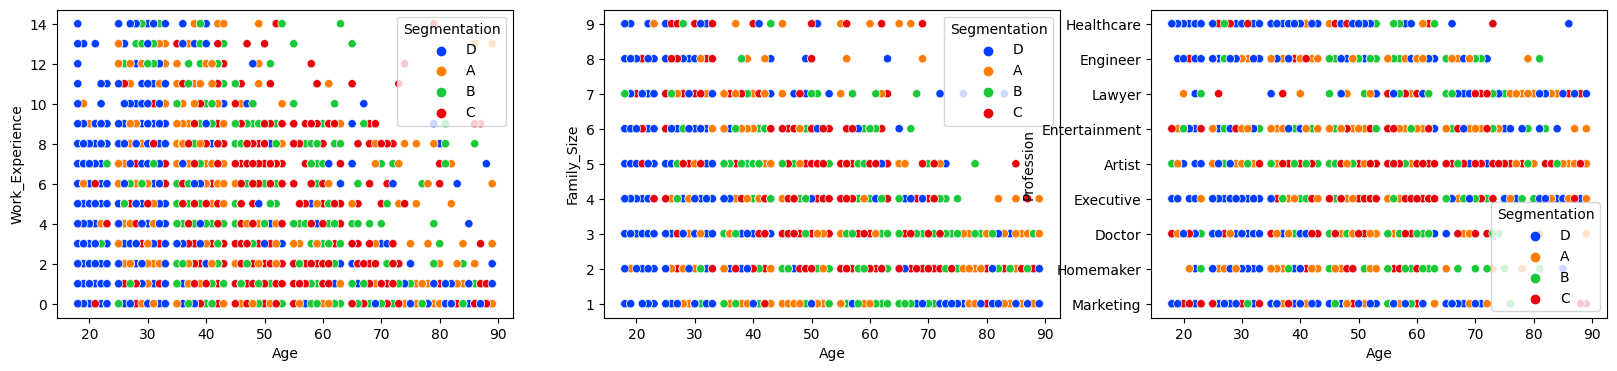

In [29]:
def plot_data():
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    sns.scatterplot(data=df, ax=axes[0], x="Age", y="Work_Experience", hue="Segmentation", palette="bright")
    sns.scatterplot(data=df, ax=axes[1], x="Age", y="Family_Size", hue="Segmentation", palette="bright")
    sns.scatterplot(data=df, ax=axes[2], x="Age", y="Profession", hue="Segmentation", palette="bright")

plot_data()

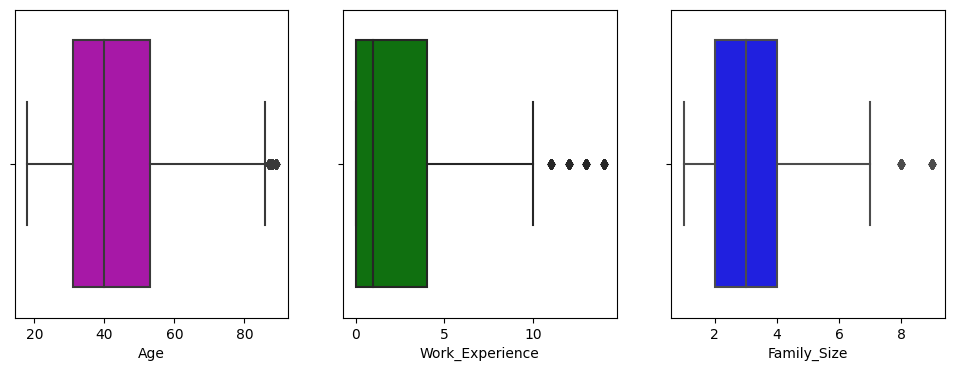

In [30]:
def plot_boxes():
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    sns.boxplot(ax=axes[0], x=df["Age"], palette=["m"])
    sns.boxplot(ax=axes[1], x=df["Work_Experience"], palette=["g"])
    sns.boxplot(ax=axes[2], x=df["Family_Size"], palette=["b"])

plot_boxes()

In [31]:
def remove_outliers(df:pd.DataFrame, column:str, z_score:int):
    z = abs(stats.zscore(df[column]))
    df = df[(z < z_score)]
    return df

df = remove_outliers(df, "Age", 2)
df = remove_outliers(df, "Work_Experience", 3)
df = remove_outliers(df, "Family_Size", 3)

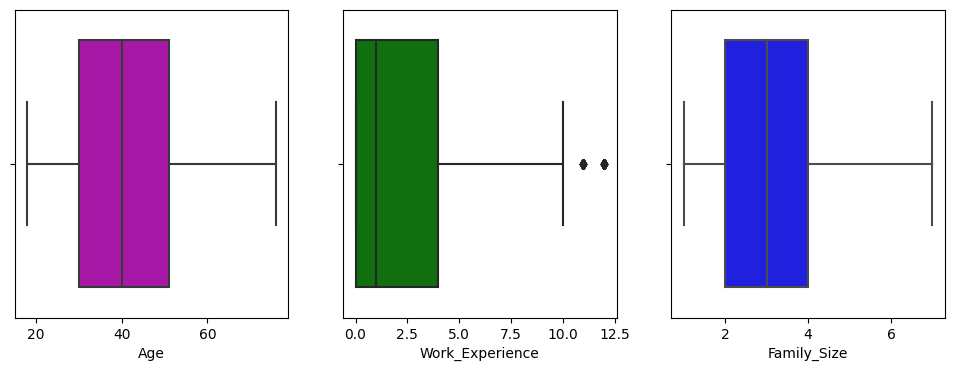

In [32]:
plot_boxes()

In [33]:
df["Segmentation"] = df["Segmentation"].replace({'A': 0, 'B': 1, 'C': 2, 'D': 3})
y = df.pop("Segmentation")

non_numeriacal = ["Gender", "Ever_Married", "Graduated",
                  "Profession", "Spending_Score", "Var_1"]
x = pd.get_dummies(df, columns=non_numeriacal)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    stratify=y, 
                                                    test_size=0.8, 
                                                    random_state=42)

In [35]:
nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=4)
nca_pipe = Pipeline([('nca', nca), ('knn', knn)])

In [36]:
nca_pipe.fit(x_train, y_train)

Pipeline(steps=[('nca', NeighborhoodComponentsAnalysis(random_state=42)),
                ('knn', KNeighborsClassifier(n_neighbors=4))])

In [37]:
now = datetime.datetime.now()
sv = now.strftime("%Y%m%d_%H%M") 
joblib.dump(nca_pipe, f"models/{sv}_kkn_model.joblib")

['models/20230422_2323_kkn_model.joblib']

In [38]:
print(nca_pipe.score(x_test, y_test))

0.44931362196409713


In [39]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x, y)

SVC()

In [40]:
print(clf.score(x_test, y_test))

0.46972896867300246


In [41]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='adam', alpha=1e-6,
                   hidden_layer_sizes=[512, 128], random_state=1)
nn.fit(x_train, y_train)

MLPClassifier(alpha=1e-06, hidden_layer_sizes=[512, 128], random_state=1)

In [42]:
print(nn.score(x_test, y_test))

0.48011263639563534


In [43]:
ld = joblib.load("models\\20230422_2035_kkn_model.joblib")
print(ld.score(x_test,y_test))
print(ld.predict(x_test))

0.44931362196409713
[1 1 3 ... 2 2 1]
